## 1. Trajectory Automation

All the task classes in VLABench have the function `get_expert_skill_sequence`, the function provide the execuable object-centric operation sequences in the environment. Here we load task `play_texas_holdem` as an example, see the initial image rendered in environment.

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


""

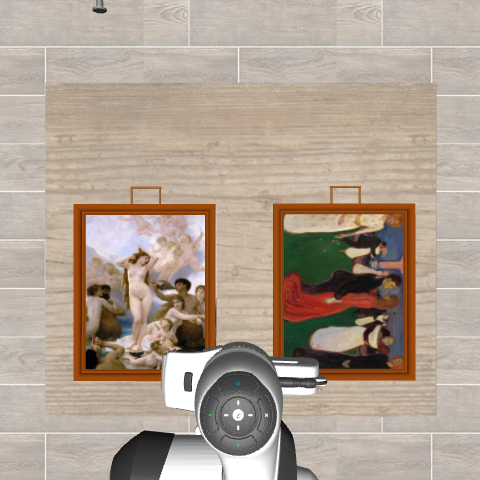

In [1]:
import numpy as np
import os
import mediapy as media
from VLABench.robots import *
from VLABench.tasks import *
from VLABench.envs import load_env

task_name = "hang_picture_on_specific_nail"
env = load_env(task_name)
env.reset()
media.show_image(env.render(camera_id=2, height=480, width=480))

You can see the expert skill sequence that should be carried out.

In [2]:
expert_skill_sequence = env.get_expert_skill_sequence()
expert_skill_sequence

[functools.partial(<function SkillLib.pick at 0x7f08d6d6ff40>, target_entity_name='la naissance de vénus (bouguereau)_painting', prior_eulers=[[-3.141592653589793, 0, 0]], openness=0.02),
 functools.partial(<function SkillLib.lift at 0x7f08d6d844c0>, gripper_state=array([0., 0.])),
 functools.partial(<function SkillLib.moveto at 0x7f08d6d6fe20>, target_pos=array([-0.04939567,  0.26405669,  1.3316013 ]), target_quat=(0.7071067811865476, -0.7071067811865475, 0.0, 0.0), gripper_state=array([0., 0.])),
 functools.partial(<function SkillLib.moveto at 0x7f08d6d6fe20>, target_pos=array([-0.04939567,  0.26405669,  1.3316013 ]), target_quat=(0.7071067811865476, -0.7071067811865475, 0.0, 0.0), gripper_state=array([0., 0.])),
 functools.partial(<function SkillLib.moveto at 0x7f08d6d6fe20>, target_pos=array([-0.04939567,  0.26405669,  1.3316013 ]), target_quat=(0.7071067811865476, -0.7071067811865475, 0.0, 0.0), gripper_state=array([0., 0.]))]

Carry out the skill sequence and the correspond observations and waypoints would be recorded.

In [5]:
key_frames = []
i =0
for skill in expert_skill_sequence:    
    obs, waypoint, stage_success, task_success = skill(env)
    key_frames.extend([o['rgb'][2] for o in obs])    
    if i > 0:
        i=0
        break
    i=i+1
media.show_video(key_frames, fps=15)

obstacle_pcd (7823, 3)
Checking if can connect to goal at 29 samples
Can connect to goal


The above describes the main logic of trajectory generation. For detailed generation scripts, please refer to the `scripts/trajectory_generation.py`.